In [1]:
import numpy as np
import matplotlib.pyplot as plt
import distances
#%load_ext line_profiler

In [2]:
class potentials(object):
        
    def coulomb(coord, q, eps0=1, pbc=False):
        vectors = distances.vectors(coord, pbc)
        dist = distances.distances(vectors)
        if dist.ndim!=0:
            dist[dist!=0] = 1/dist[dist!=0]
        else:
            dist = 1/dist
        return 1/(4*np.pi*eps0) * np.dot(dist, q)
    
    def LJ(coord, eps=1, sig=1, pbc=False):
        vectors = distances.vectors(coord, pbc)
        dist = distances.distances(vectors)
        if dist.ndim!=0:
            dist[dist!=0] = 1/dist[dist!=0]
        else:
            dist = 1/dist
        pot_rep = np.dot(eps*sig**12,dist**12) 
        pot_atr = np.dot(eps*sig**6,dist**6)
        pot = pot_rep - pot_atr
        return np.sum(pot, axis=-1)
    
    def harmonic(coord, r0=0, k=1):
        return k/2*(np.linalg.norm(coord - r0, axis=-1))**2

In [3]:
class gradients(object):

    def coulomb(coord, q, eps0=1, pbc=False):
        vectors = distances.vectors(coord, pbc)
        dist = distances.distances(vectors)
        dist[dist!=0] = 1/dist[dist!=0]**3
        D = dist[:,:,None]*vectors
        return q[:, None]*np.einsum("ijk, j",D, q)
    
    def LJ(coord, sig=1, eps=1, pbc=False):
        vectors = distances.vectors(coord, pbc)
        dist = distances.distances(vectors)
        dist[dist!=0] = 1/dist[dist!=0]
        D_att = 6 * sig**6 * dist**8
        D_rep = -12 * sig**12 * dist**14
        D = 4*(eps*(D_att + D_rep))[:, :, None]*vectors
        return np.sum(D, axis=-2)
    
    def harmonic(coord, r0=0, k=1):
        return k*(coord- r0)

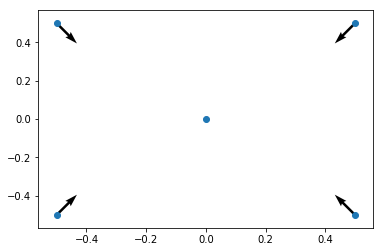

In [4]:
pos = np.asarray([[-1/2, -1/2],[-1/2, 1/2],[1/2, 1/2],[1/2, -1/2],[0,0]])
forces=gradients.coulomb(pos,np.asarray([1, 1, 1, 1,-1]),1)
plt.quiver(pos[:,0],pos[:,1],forces[:,0],forces[:,1],scale=1)
plt.scatter(pos[:, 0], pos[:, 1])
plt.show()

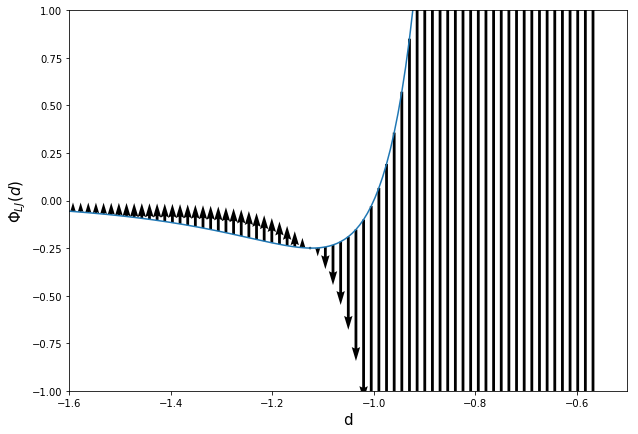

In [5]:
x = np.linspace(-2, -0.5, 200)
y = np.linspace(0, 0, 200)
step = 2
cutoff = 1
eps = 1
sig = 1
grid = np.asarray([[[x[i],0],[0,0]] for i in range(len(x))])
pot_array=np.asarray([potentials.LJ(g) for g in grid])
force_array=np.asarray([gradients.LJ(g) for g in grid])
force_1 = force_array[:,1,:]
plt.figure(figsize=(10,7))
plt.xlim(-1.6,-0.5)
plt.ylim([-1,1])
plt.xlabel("d", fontsize=15)
plt.ylabel("$\Phi_{LJ}(d)$",fontsize=15)
plt.quiver(x[:-cutoff:step], pot_array[:-cutoff:step,1],force_1[:-cutoff:step,1],force_1[:-cutoff:step,0], scale=50, width=0.005)
plt.plot(x,pot_array[:,0])
plt.show()